In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# check how many missing values there are in each column
df.isnull().sum()


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [4]:
df.shape

(16719, 16)

In [5]:
#clean the dataset

In [6]:
# drop rows of data when Year_of_Release is missing 
df = df.dropna(subset=['Year_of_Release'])   

#convert the column Year_of_Release from float to int because it's a year
df['Year_of_Release'] = df['Year_of_Release'].astype(int)


/var/folders/3g/czpb9hc56kl8ssmt9pydrw040000gn/T/ipykernel_1945/2451716615.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_of_Release'] = df['Year_of_Release'].astype(int)


In [7]:
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

In [8]:
#genre

#delete the rows where publisher is missing data points
df = df.dropna(subset=['Genre'])   

In [9]:
#publisher

#delete the rows where publisher is missing data points
df = df.dropna(subset=['Publisher'])   

In [10]:
#Critic_Score
df['Critic_Score'].median()

np.float64(71.0)

In [11]:
#Critic_Count
df['Critic_Count'] = pd.to_numeric(df['Critic_Count'], errors='coerce')
df['Critic_Count'].median()

np.float64(22.0)

In [12]:
#User_Score
#converting from String to integer
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

#find median of User_score
df['User_Score'].median()

np.float64(7.5)

In [13]:
#User_Count
#find mode of User_Count
df['User_Count'].mode()

0    4.0
Name: User_Count, dtype: float64

In [14]:
#Developer
####make it numeric and then write the mode
##########df['Developer'] = pd.to_numeric(df['Developer'], errors='coerce')


# df['Developer'].mode()

df['Developer'] = df['Developer'].astype(str)

df['Developer'] = df['Developer'].replace('nan', 'Unknown')

#########the developer shouln't be 2015


In [15]:
# df['Rating'].unique()
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
df['Rating'] = df['Rating'].astype(str)
df['Rating'] = df['Rating'].replace('nan', 'Not Rated')

In [17]:
df.fillna({'Critic_Score': 71, 'Critic_Count': 22, 'User_Score': 7.5, 'User_Count': 4.0}, inplace=True)

In [18]:
df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [19]:
#check the data types of each column
df.dtypes

Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

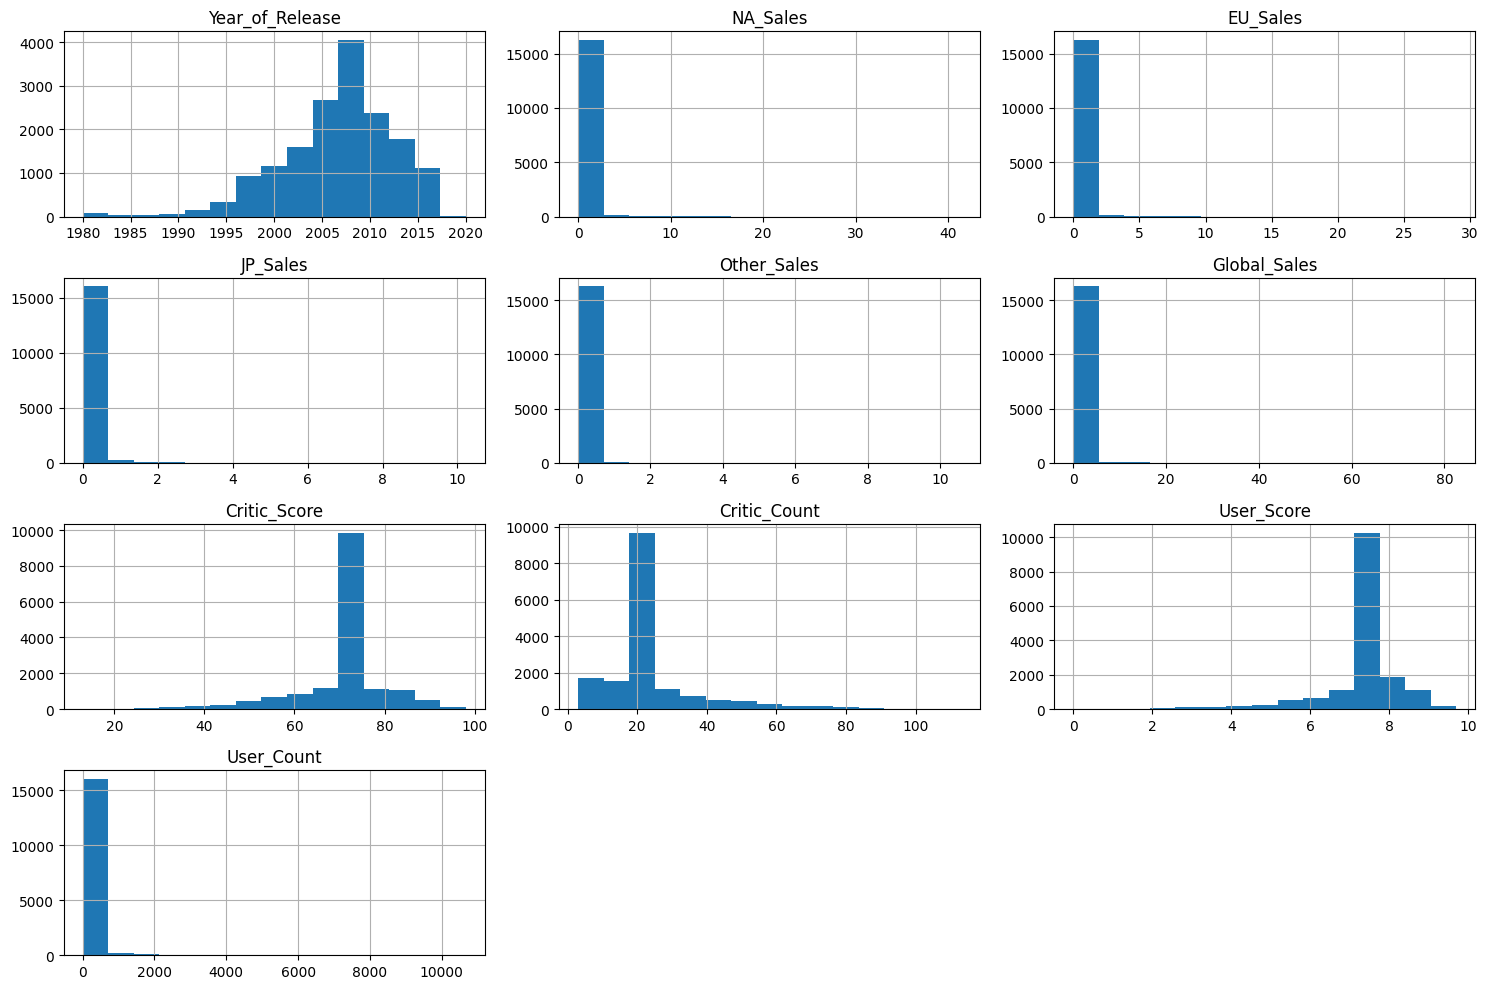

In [20]:
#histogram 
df.hist(figsize=(15, 10), bins=15)
plt.tight_layout()
plt.show()

In [21]:
# splittig the data into features and labels
X = df.drop(columns=['Name', 'Platform', 'Genre', 'Publisher', 'Developer', 'Rating']) # categorical columns
y = X.columns[:-1]

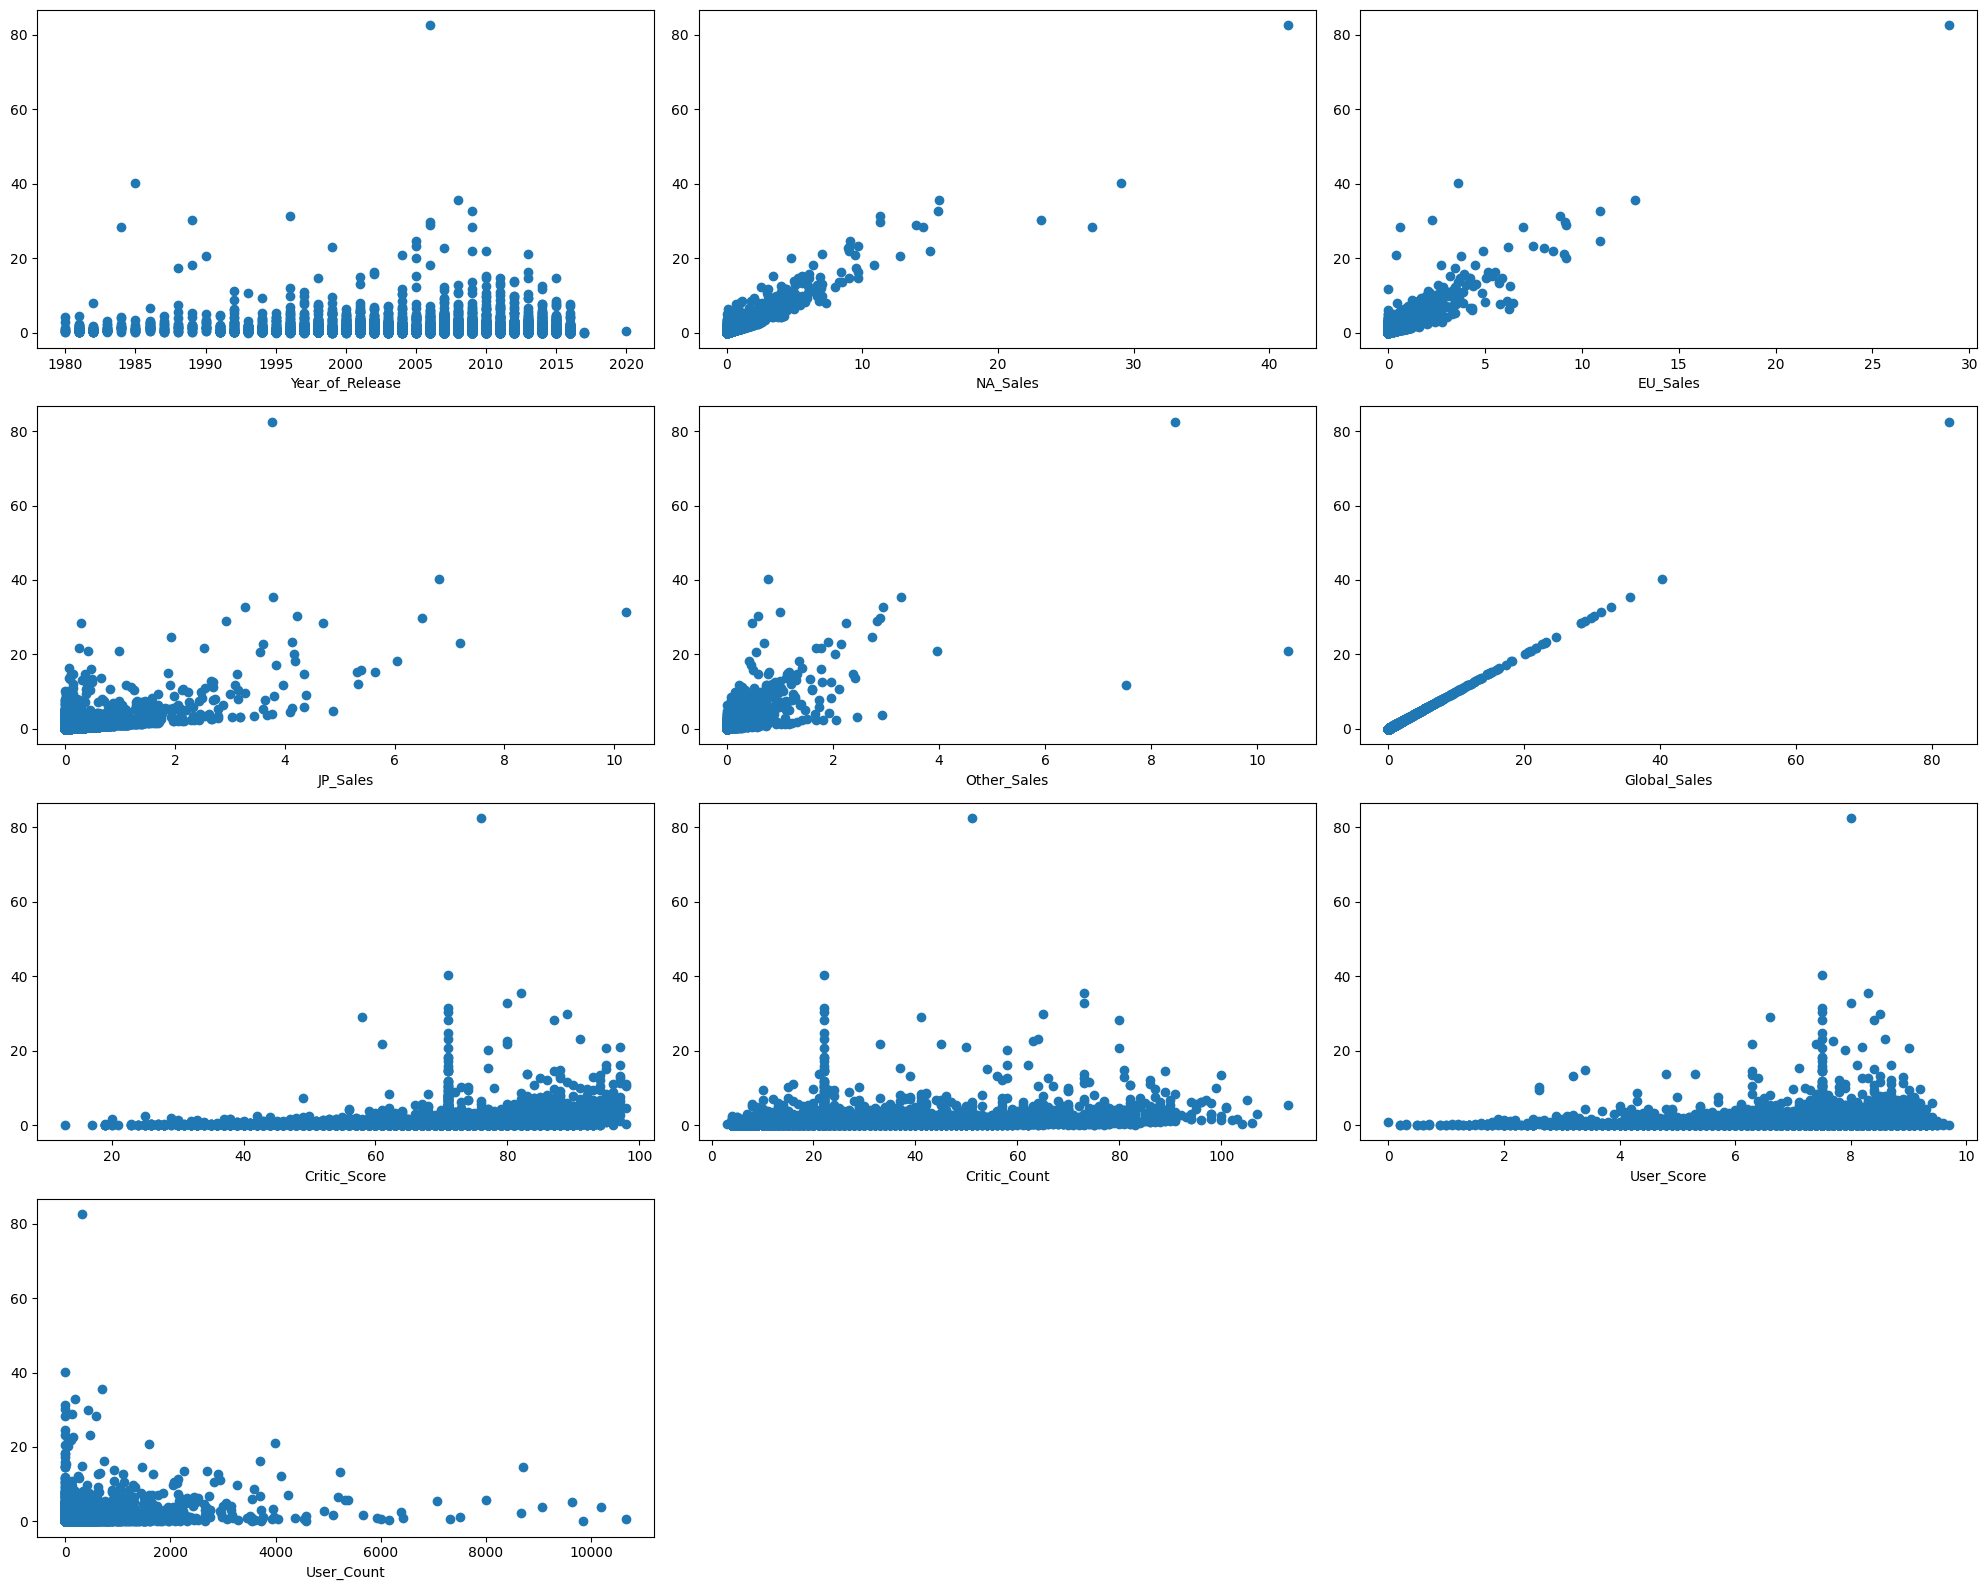

In [22]:
um_cols = len(X.columns)
ncols = 3
nrows = int(np.ceil(um_cols / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 4 * nrows))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].scatter(X[col], df['Global_Sales'])
    axes[i].set_xlabel(col)
# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

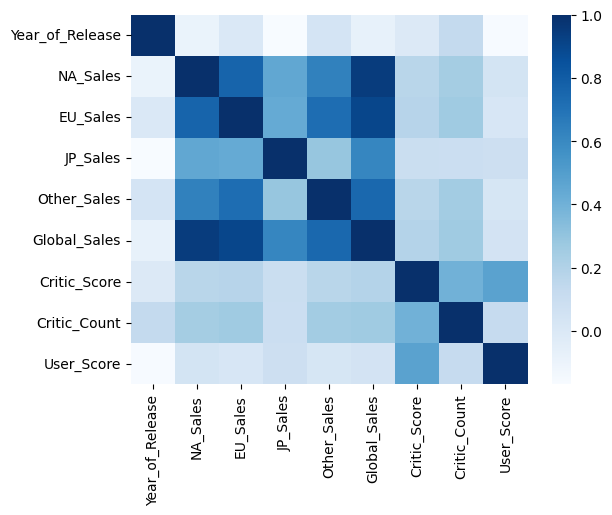

In [23]:
sns.heatmap(df[y].corr(), annot=False, fmt=".2f", cmap="Blues")
plt.show()

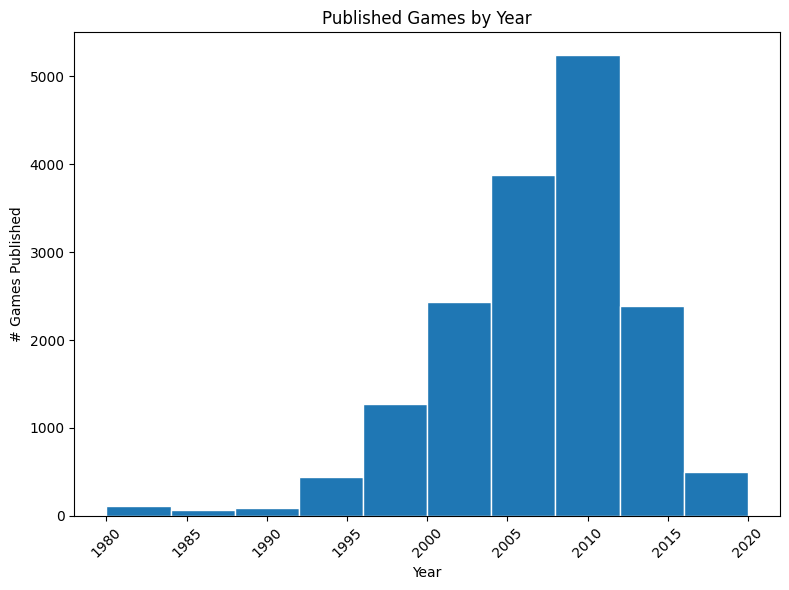

In [24]:
#histogram of the labels
plt.figure(figsize=(8, 6))
plt.hist(df['Year_of_Release'], bins=10, edgecolor='white')
plt.xlabel('Year')
plt.ylabel('# Games Published')
plt.title('Published Games by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,71.0,22.0,7.5,4.0,Unknown,Not Rated
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,71.0,22.0,7.5,4.0,Unknown,Not Rated
